In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
test_data = pd.read_csv('./test.csv')
df=pd.read_csv('./train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(method='bfill')
print(f"Missing age values: {df['Age'].isnull().sum()},\nMissing Embarked values: {df['Embarked'].isnull().sum()}")
df.describe()


Missing age values: 0,
Missing Embarked values: 0


C:\Users\win\AppData\Local\Temp\ipykernel_11016\1094609461.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked']=df['Embarked'].fillna(method='bfill')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df=df.drop(columns=['PassengerId','Name', 'Ticket','Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


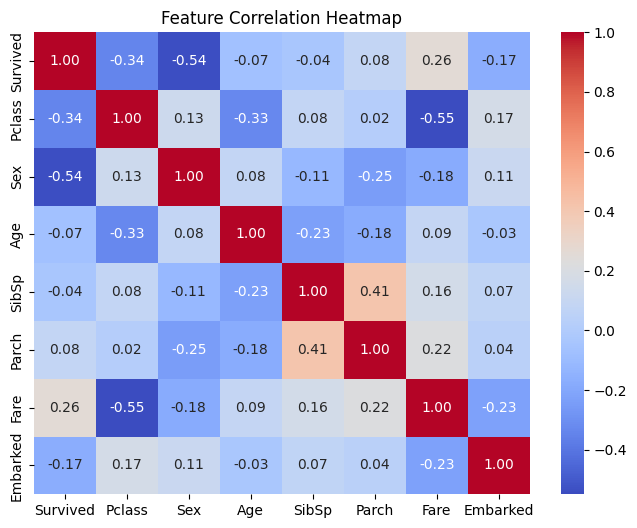

In [40]:
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [63]:
X=df.drop(columns='Survived', axis=1)
Y=df['Survived']

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [64]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)


In [123]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=35)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=35)

In [124]:
from sklearn.metrics import accuracy_score  
Y_train_pred=model.predict(X_train)
Tacc=accuracy_score(Y_train, Y_train_pred)
print(f"Training accuracy : {Tacc:.2f}")

Y_test_pred=model.predict(X_test)
Tecc=accuracy_score(Y_test, Y_test_pred)
print(f"Testing accuracy : {Tecc:.2f}")

Training accuracy : 0.90
Testing accuracy : 0.82


In [130]:


test_data['Age'] = test_data['Age'].fillna(df['Age'].mean())
test_data['Embarked'] = test_data['Embarked'].fillna(method='bfill')

test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])


C:\Users\win\AppData\Local\Temp\ipykernel_11016\4122040152.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['Embarked'] = test_data['Embarked'].fillna(method='bfill')


In [131]:
predictions = model.predict(test_data)


In [132]:
original_test_data = pd.read_csv('./test.csv')

submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)